In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
bert_df = pd.read_csv('regression_df_bert_scaled.csv', index_col=0)
roberta_df = pd.read_csv('regression_df_roberta_scaled.csv', index_col=0)

<AxesSubplot:xlabel='num_com', ylabel='sentiment_score'>

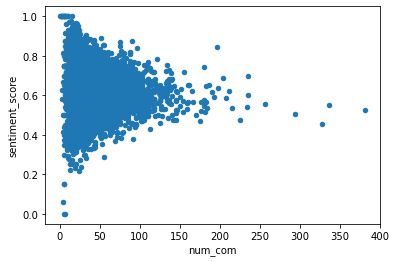

In [29]:
bert_df.plot.scatter(x='num_com', y='sentiment_score')

<AxesSubplot:xlabel='num_com', ylabel='sentiment_score'>

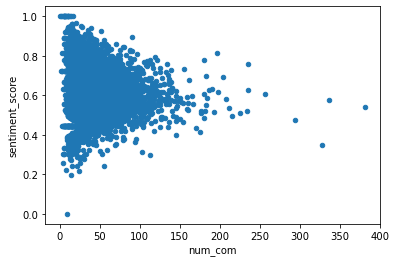

In [30]:
roberta_df.plot.scatter(x='num_com', y='sentiment_score')

In [3]:
bert_sentiment = bert_df[['sentiment_score']]
roberta_sentiment = roberta_df[['sentiment_score']]

In [12]:
bert_sentiment.join(roberta_sentiment)

ValueError: columns overlap but no suffix specified: Index(['sentiment_score'], dtype='object')

In [9]:
bert_sentiment.var()

sentiment_score    0.011707
dtype: float64

array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

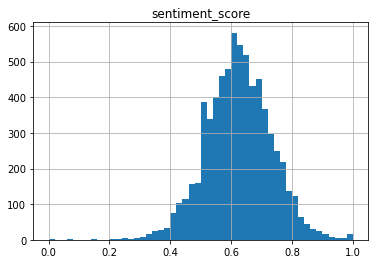

In [4]:
bert_sentiment.hist(bins=50)

In [10]:
roberta_sentiment.var()

sentiment_score    0.012343
dtype: float64

array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

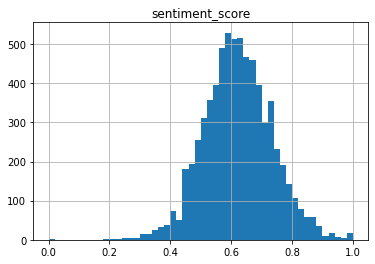

In [5]:
roberta_sentiment.hist(bins=50)

In [14]:
df = bert_sentiment.join(roberta_sentiment, lsuffix = '_bert', rsuffix = '_roberta')

In [16]:
df['mean'] = df.mean(axis=1)

In [26]:
df

,sentiment_score_bert,sentiment_score_roberta,mean
0,0.689024,0.701897,0.695461
1,0.680000,0.555556,0.617778
2,0.699275,0.581320,0.640298
3,0.466667,0.481481,0.474074
4,0.346154,0.465812,0.405983
...,...,...,...
6937,0.562500,0.618056,0.590278
6938,0.583333,0.481481,0.532407
6939,0.514706,0.542484,0.528595
6940,0.423611,0.413580,0.418596


<AxesSubplot:xlabel='sentiment_score_bert', ylabel='sentiment_score_roberta'>

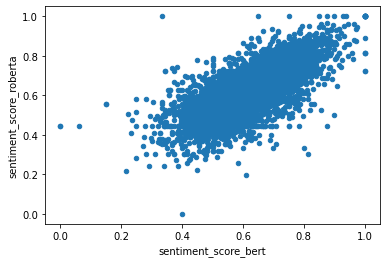

In [27]:
df.plot.scatter(x='sentiment_score_bert', y='sentiment_score_roberta')

In [18]:
out_df = roberta_df.join(df[['mean']])

In [20]:
out_df = out_df.drop(columns=['sentiment_score']).rename(columns={'mean':'sentiment_score'})

In [22]:
out_df.to_csv('regression_df_bert_roberta_mean.csv')

In [2]:
vader_df = pd.read_csv('thread_sentiment.csv', index_col=0)
bert_df = pd.read_csv('thread_sentiment_bert.csv', index_col=0)
bert_truncated = pd.read_csv('regression_df_bert_truncated.csv', index_col=0)
roberta_df = pd.read_csv('thread_sentiment_roberta.csv', index_col=0)

(-1.0, 1.0)

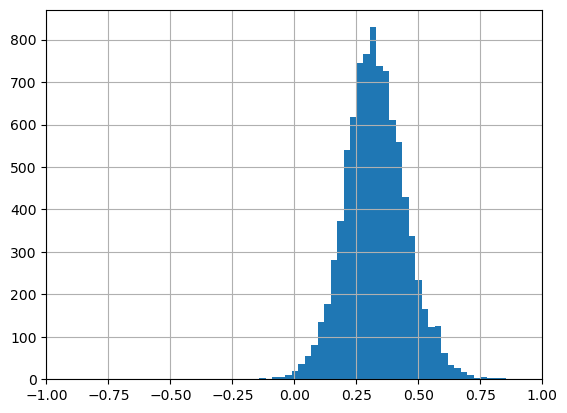

In [6]:
vader_df['sentiment_score'].hist(bins=50)
plt.xlim([-1,1])

(1.0, 5.0)

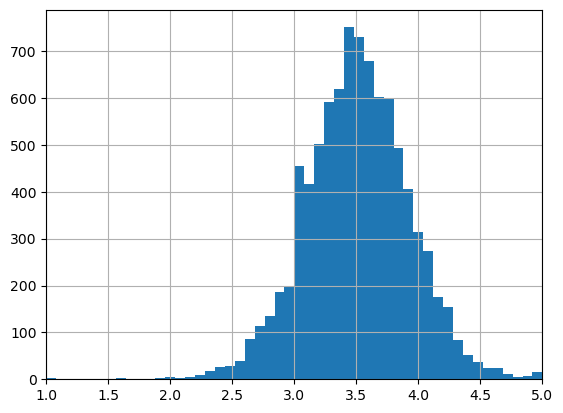

In [7]:
bert_df['sentiment_score'].hist(bins=50)
plt.xlim([1,5])

(-1.0, 1.0)

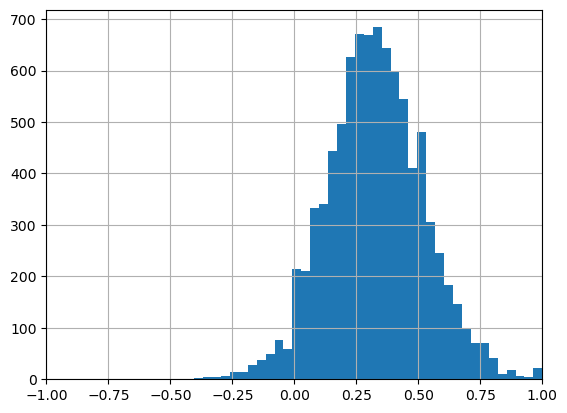

In [5]:
roberta_df['sentiment_score'].hist(bins=50)
plt.xlim([-1,1])

In [10]:
bigdf = roberta_df.merge(bert_df, on='id', how='inner')

In [11]:
bigdf[['sentiment_score_x', 'sentiment_score_y']].corr()

,sentiment_score_x,sentiment_score_y
sentiment_score_x,1.00000,0.71864
sentiment_score_y,0.71864,1.00000


In [7]:
bigdf[['sentiment_score_x', 'sentiment_score_y']]

,sentiment_score_x,sentiment_score_y
0,3.578947,0.298800
1,2.708333,0.246371
2,3.238095,0.251314
3,3.250000,0.209415
4,3.400000,0.350935
...,...,...
8884,3.272727,0.374164
8885,3.785714,0.246771
8886,2.647059,0.138361
8887,3.500000,0.247779


In [15]:
scaler = MinMaxScaler()

In [24]:
vader_s = vader_df['sentiment_score']
vader_s = vader_s[:, np.newaxis]

<ipython-input-24-0d7c572d516c>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  vader_s = vader_s[:, np.newaxis]


In [26]:
bert_s = bert_df['sentiment_score']
bert_s = bert_s[:, np.newaxis]

<ipython-input-26-a52c6cac1586>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bert_s = bert_s[:, np.newaxis]


In [27]:
vader_scaled = scaler.fit_transform(vader_s)
bert_scaled = scaler.fit_transform(bert_s)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

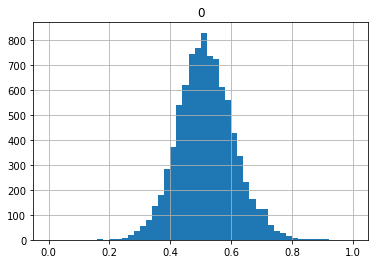

In [29]:
pd.DataFrame(vader_scaled).hist(bins = 50)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

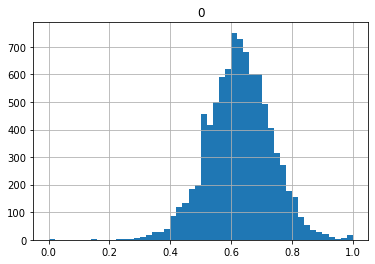

In [30]:
pd.DataFrame(bert_scaled).hist(bins = 50)